In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.0'

In [4]:
keras.__version__

'2.4.0'

# Data import

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [11]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test/255.0

In [13]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

# Model building

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(50,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.layers

In [37]:
hidden1 = model.layers[1]

In [38]:
hidden1.name

'dense_6'

In [40]:
model.get_layer("dense_6") is hidden1

True

In [41]:
weights,biases = hidden1.get_weights()

In [42]:
weights

array([[-0.00469381, -0.0278222 , -0.01899419, ...,  0.06899902,
        -0.04775124,  0.02379005],
       [ 0.04650929,  0.00333541,  0.04439558, ..., -0.05479831,
        -0.04236915,  0.01844201],
       [-0.07278273, -0.05006896, -0.0077229 , ...,  0.00670597,
         0.05840525,  0.00204294],
       ...,
       [-0.0082125 ,  0.0398549 ,  0.05309498, ..., -0.04380633,
         0.00808731,  0.04387659],
       [-0.07109479, -0.03316416, -0.04846422, ...,  0.05218947,
         0.07252842,  0.03508308],
       [-0.02511024,  0.03832322,  0.04715234, ...,  0.06100605,
        -0.01799443,  0.01731188]], dtype=float32)

In [43]:
weights.shape

(784, 300)

In [44]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
biases.shape

(300,)

In [46]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd",metrics = ["accuracy"])

In [47]:
history = model.fit(X_train,y_train,epochs = 50,validation_data = (X_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7302 - accuracy: 0.7549 - val_loss: 0.5577 - val_accuracy: 0.7974
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4835 - accuracy: 0.8294 - val_loss: 0.4399 - val_accuracy: 0.8490
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4339 - accuracy: 0.8464 - val_loss: 0.4080 - val_accuracy: 0.8598
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4026 - accuracy: 0.8585 - val_loss: 0.3847 - val_accuracy: 0.8664
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3798 - accuracy: 0.8648 - val_loss: 0.3652 - val_accuracy: 0.8752
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3609 - accuracy: 0.8714 - val_loss: 0.3743 - val_accuracy: 0.8650
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3465 - accuracy: 0.8770 - val_loss: 0.3632 - val_accuracy:

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

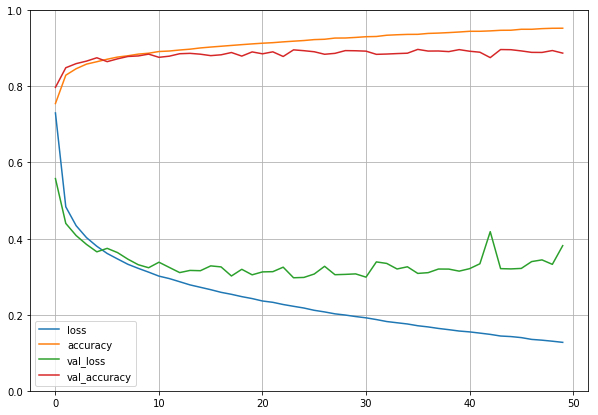

In [49]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
X_new = X_test[:3]

In [51]:
y_proba = model.predict(X_new)

In [52]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

# MLP regression